In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats



In [ ]:
# Load the data1 txt file using numpy
y, X = np.loadtxt('/DataHW1.txt', skiprows=1, unpack=True)
X = sm.add_constant(X)

# assigning and fitting:
# X number of copiers serviced
# Y total number of minutes spent by service person
model = sm.OLS(y, X).fit()

# Display a summary of the regression results.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     933.4
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.58e-30
Time:                        04:15:16   Log-Likelihood:                -157.56
No. Observations:                  44   AIC:                             319.1
Df Residuals:                      42   BIC:                             322.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1089      2.867      0.038      0.9

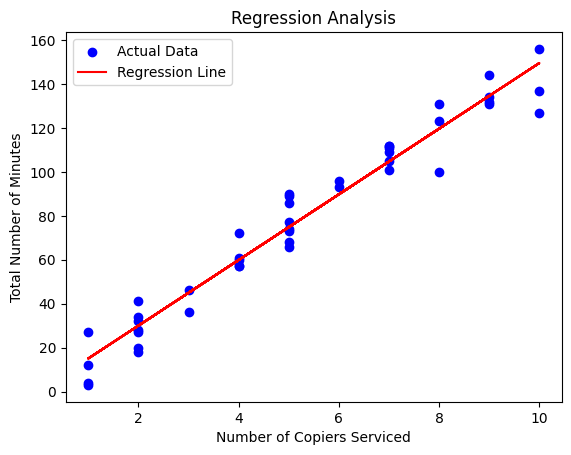

In [ ]:
# removing constant from X so size of X and Y are the same
X_original = X[:, 1]
#Plotting data
plt.scatter(X_original, y, color='blue', label='Actual Data')

# Plotting the regression line
y_pred = 0.1089 + 14.9439 * X_original
plt.plot(X_original, y_pred, color='red', label='Regression Line')

# Setting labels, title, and legend, then displaying plot
plt.xlabel('Number of Copiers Serviced')
plt.ylabel('Total Number of Minutes')
plt.title('Regression Analysis')
plt.legend()
plt.show()

In [ ]:
# Calculating X = 5 copiers are serviced
X_value = 5
Y_estimate = 0.1089 + 14.9439 * X_value
print(Y_estimate)


74.8284


In [ ]:
# Storing values of Coefficients for Calculation
# degrees of freedom = n - 2
x1_coeff = 14.9439
x1_std_err = 0.489
df = 44-2

# Getting critical value of t when α = 0.10
t_critical = stats.t.ppf(1 - 0.05/2, df)

# Computing the margin of error
margin_error = t_critical * x1_std_err

# Creating Confidence Interval
lower_bound = x1_coeff - margin_error
upper_bound = x1_coeff + margin_error

print(f"90% Confidence Interval\n({lower_bound}, {upper_bound})")


90% Confidence Interval
(13.957058050120114, 15.930741949879884)


In [ ]:
# T-test for linear association between X and Y

# Calculating t-statistic for hypothesis testing
t_statistic = x1_coeff / x1_std_err

# Computing two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
if p_value < 0.10:
    print(f"P-value = {p_value}\nReject Null Hypothesis")
else:
    print(f"P-value = {p_value}\nFail to Reject Null Hypothesis")


P-value = 0.0
Reject Null Hypothesis


In [ ]:
# T-test for Tri-City Standards

# Computing t-statistic for the difference from 14 minutes/copier
t_statistic = (x1_coeff - 14) / x1_std_err

# Computing the one-tailed p-value (right-tailed)
p_value = 1 - stats.t.cdf(t_statistic, df)

if p_value < 0.05:
    print(f"T-statistic: {t_statistic}\nP-value: {p_value}\nReject Null Hypothesis")
else:
    print(f"T-statistic: {t_statistic}\nP-value: {p_value}\nFail to Reject Null Hypothesis")


T-statistic: 1.9302658486707553
P-value: 0.030172379923012138
Reject Null Hypothesis


In [ ]:
!jupyter nbconvert --to html #path of file goes here

[NbConvertApp] Converting notebook /bin/AMS318HW1.ipynb to html
[NbConvertApp] Writing 631868 bytes to /bin/AMS318HW1.html
